# Import Libraries

In [1]:
# Import required libraries
import sys
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import util as utils

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [2]:
# Load configuration file
config = utils.load_config()

# Data Exploration

In [3]:
# Load train dataset
X_train = utils.pickle_load(config["train_path"][0])
y_train = utils.pickle_load(config["train_path"][1])

train = pd.concat([X_train, y_train], axis=1)

In [4]:
# Show data sample
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13382,31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,unknown,no
32641,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown,no
3991,24,blue-collar,single,secondary,no,77,yes,no,unknown,16,may,236,2,-1,0,unknown,no
8068,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,jun,579,2,-1,0,unknown,no
27484,37,services,single,secondary,no,105,no,yes,cellular,21,nov,197,2,157,4,failure,no


In [5]:
# Show number of rows and columns
print(f"Number of rows: {train.shape[0]}")
print(f"Number of columns: {train.shape[1]}")

Number of rows: 31647
Number of columns: 17


In [6]:
# Show a concise summary of data
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31647 entries, 13382 to 3184
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
 16  y          31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB


In [7]:
# Check missing values in data
print(f"Number of rows with missing values: {train.isnull().sum().sum()}")

Number of rows with missing values: 0


In [8]:
# Check data range for numerical columns
data_range = pd.DataFrame(columns=["Features", "Min", "Max"])
for column in train[config["int_columns"]].columns:
    data = pd.DataFrame(data={"Features": [column], "Min": [train[column].min()], "Max": [train[column].max()]})
    data_range = pd.concat([data_range, data], axis=0)

# Show result
data_range.reset_index(drop=True)

,Features,Min,Max
0,age,18,95
1,balance,-8019,102127
2,day,1,31
3,duration,0,4918
4,campaign,1,63
5,pdays,-1,871
6,previous,0,275


In [9]:
# Check label proportion
train["y"].value_counts(normalize=True)

y
no     0.883022
yes    0.116978
Name: proportion, dtype: float64

There are only 12% of data that labelled as `yes`, it means this data is imbalanced. So we need to do resampling method later. For now, we will do under sampling for data exploration. Hopefully by doing this we can get more insight from the data.

In [10]:
# Random under sampling
X_rus, y_rus = RandomUnderSampler(random_state=42).fit_resample(
    train.drop(columns=config["label"]),
    train[config["label"]]
)

train_rus = pd.concat([X_rus, y_rus], axis=1)

## Age

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

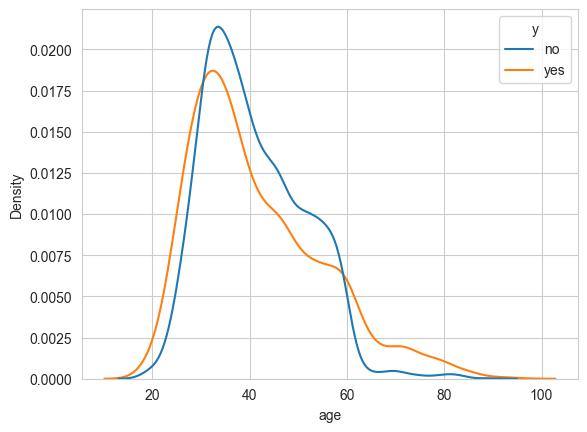

Data skewness: 0.8659376962148376


In [11]:
# Check data distribution
sns.kdeplot(train_rus, x="age", hue="y")
plt.show()
print(f"Data skewness: {train_rus['age'].skew()}")

`age` column is moderately skew. Based on `train_rus`, we see that there is no significant difference between `no` and `yes` class in terms of `age` distribution.

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


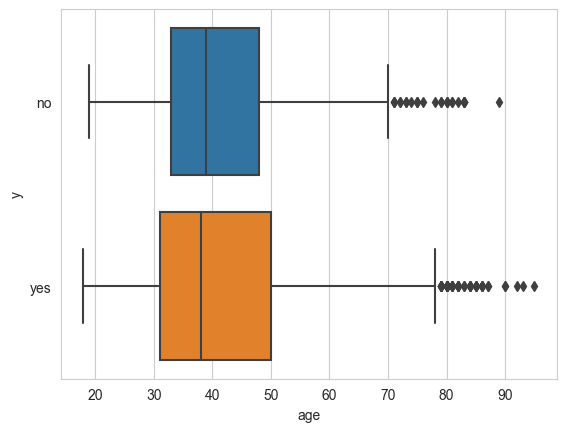

In [12]:
# Check outliers
sns.boxplot(train_rus, x="age", y="y")
plt.show()

There are some outliers in `age` column.

## Job

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

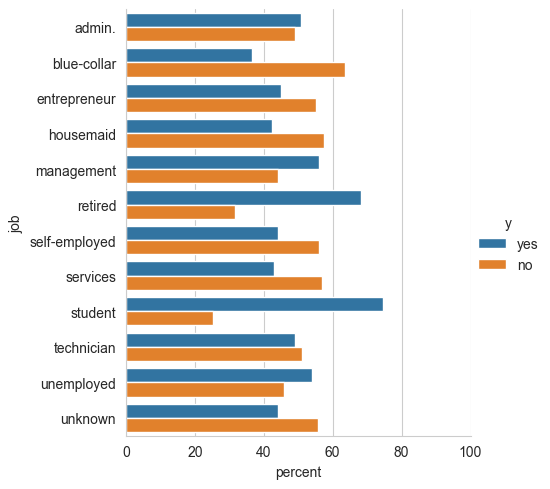

In [13]:
# Check proportion of data
x = "job"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(y=x,x="percent", hue=y, kind="bar",data=temp)
g.ax.set_xlim(0, 100)

When client has job category `retired` and `student`, they has higher probability to answer `yes` in current campaign, while `blue-collar` has higher probability to answer `no`. Since for other `job` has similar probability, we can re-categorize `job` into 4 class: `blue-collar`, `retired`, `student`, and `others`. By doing this we can reduce data dimension when using One-Hot Encoding.

## Marital

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

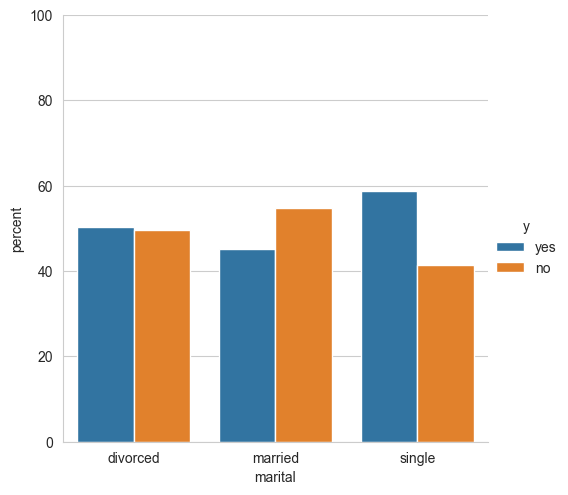

In [14]:
# Check proportion of data
x = "marital"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

There is no significant difference between `marital` in terms of probability to become `yes`. But since there are only 3 category, for now we can keep this column even we need to do one-hot encoding.

## Education

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

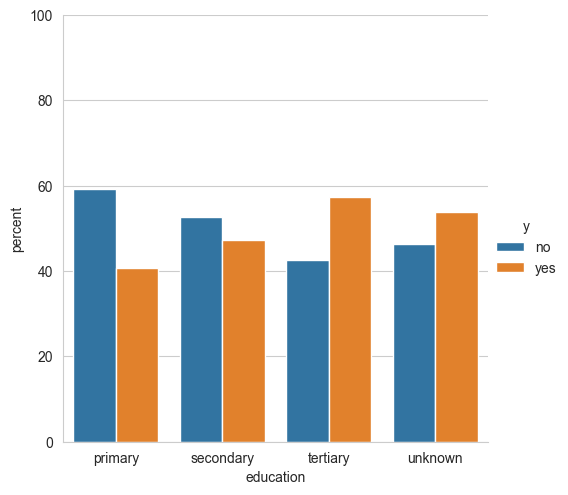

In [15]:
# Check proportion of data
x = "education"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

In [16]:
# Check how many unknown education
print(f"Percentage of row with unknown education: {train[train['education'] == 'unknown'].shape[0] / train.shape[0]}")

Percentage of row with unknown education: 0.04152052327234809


There is no significant difference between `education` in terms of probability to become `yes`. We can do label encoding due to it's ordinality. For `unknown`, it has similar pattern with `secondary`, so later we will assume `unknown` as `secondary`, considering it's only 4% of the data.

## Default

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

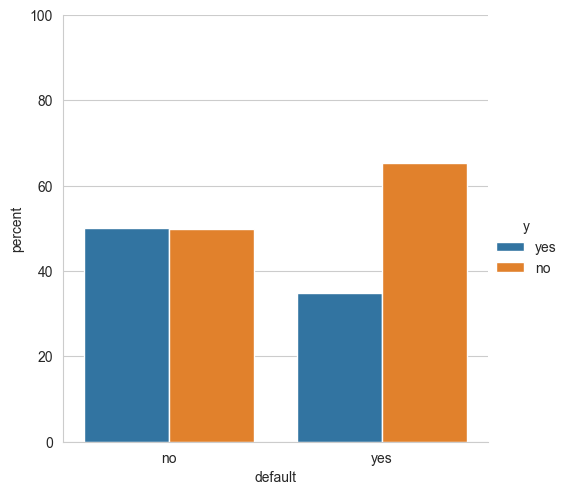

In [17]:
# Check proportion of data
x = "default"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

When client has default credit, it tend to answer `no`. It make sense, since usually they want to focus on their credit first before applying for another campaign.

## Balance

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

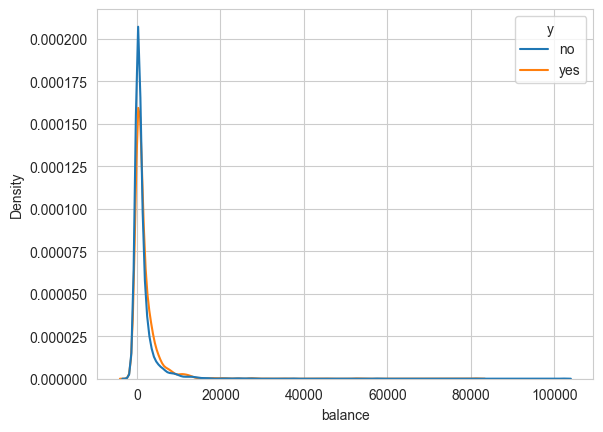

Data skewness: 10.70199087530434


In [18]:
# Check data distribution
sns.kdeplot(train_rus, x="balance", hue="y")
plt.show()
print(f"Data skewness: {train_rus['balance'].skew()}")

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


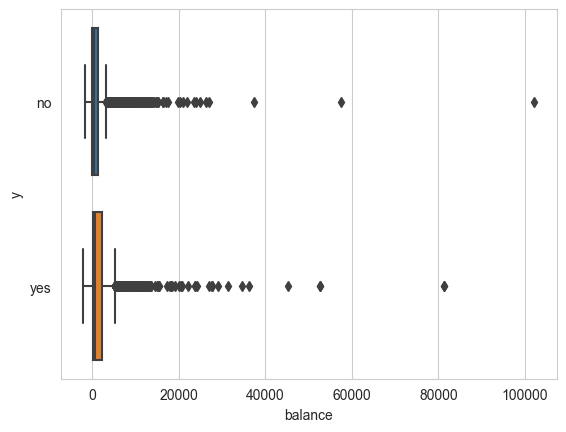

In [19]:
# Check outliers
sns.boxplot(train_rus, x="balance", y="y")
plt.show()

`balance` column is very skew. Let's try to see it's distribution when we take out the outliers.

In [20]:
def remove_outliers(data, column, threshold=1.5):
    """
    Remove outliers from a numerical column in a DataFrame using the IQR method.

    Parameters:
    - data: DataFrame
        The DataFrame containing the data.
    - column: str
        The name of the numerical column from which outliers will be removed.
    - threshold: float, optional (default=1.5)
        The threshold for determining outliers. Values beyond (Q3 + threshold * IQR) or below (Q1 - threshold * IQR)
        are considered outliers, where Q1 is the first quartile, Q3 is the third quartile, and IQR is the interquartile range.

    Returns:
    - DataFrame
        A DataFrame with outliers removed from the specified column.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Filter the data to remove outliers
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data_no_outliers

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

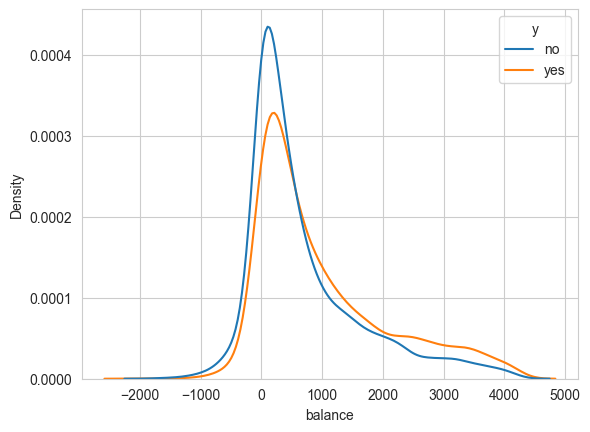

Data skewness: 1.3034306202685617


In [21]:
# Check data distribution
sns.kdeplot(remove_outliers(train_rus, column="balance"), x="balance", hue="y")
plt.show()
print(f"Data skewness: {remove_outliers(train_rus, column='balance')['balance'].skew()}")

There is no significant difference between `yes` and `no` in terms of `balance` distribution.

## Housing

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

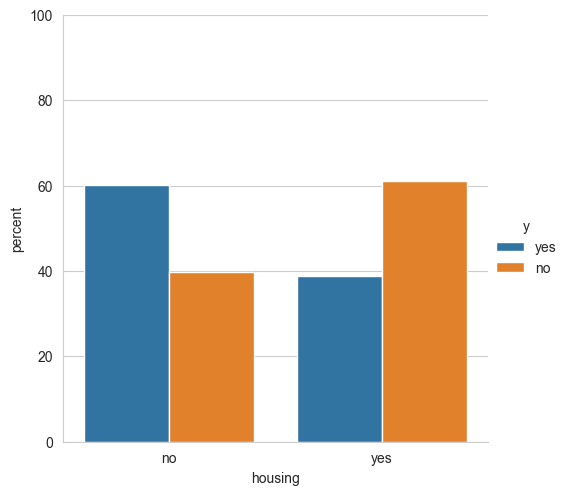

In [22]:
# Check proportion of data
x = "housing"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

Client that has `housing` loan tend to answer `no`. It make sense since they want to focus on their `housing` loan.

## Loan

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

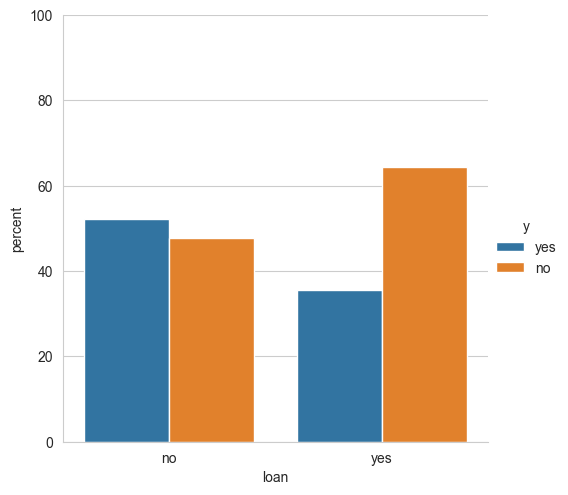

In [23]:
# Check proportion of data
x = "loan"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

Client that has `loan` tend to answer `no`. It make sense since they want to focus on their `loan`.

## Contact

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

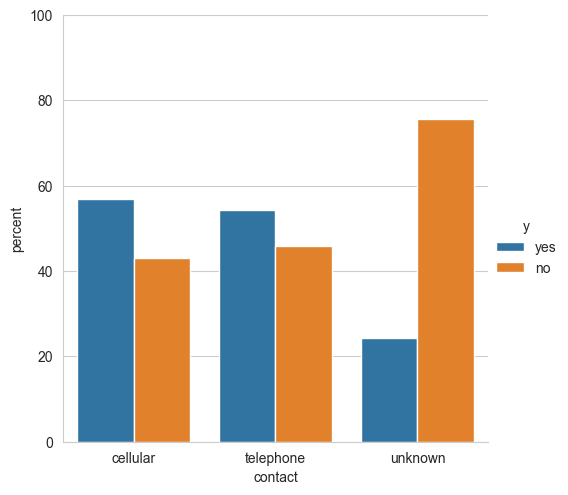

In [24]:
# Check proportion of data
x = "contact"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

In [25]:
# Check how many unknown contact
print(f"Percentage of row with unknown contact: {train[train['contact'] == 'unknown'].shape[0] / train.shape[0]}")

Percentage of row with unknown contact: 0.28754700287547


`contact` type `unknown` tend to answer `no`, while the others has similar probability. Later we will only categorize it into 2: `unknown` and `cellular/telephone` due to it's similarity.

## Day

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

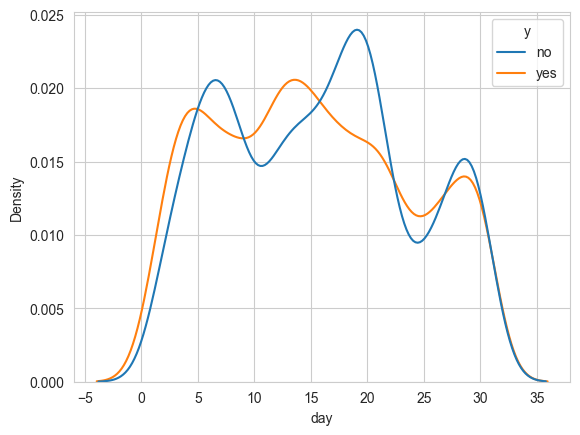

Data skewness: 0.1373172714316125


In [26]:
# Check data distribution
sns.kdeplot(train_rus, x="day", hue="y")
plt.show()
print(f"Data skewness: {train_rus['day'].skew()}")

There is no significant difference between `yes` and `no` in terms of `day` distribution.

## Month

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

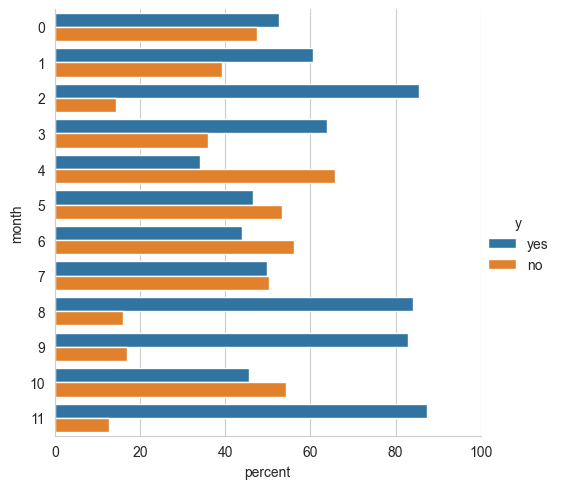

In [27]:
# Check proportion of data
x = "month"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

temp["month"] = temp["month"].apply(lambda x: str(config["month_code"][x]))

g = sns.catplot(y=x,x="percent", hue=y, kind="bar",data=temp, order=[str(i) for i in range(12)])
g.ax.set_xlim(0, 100)

Client tend to answer `yes` in several month. It means this feature potentially importance.

## Duration

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

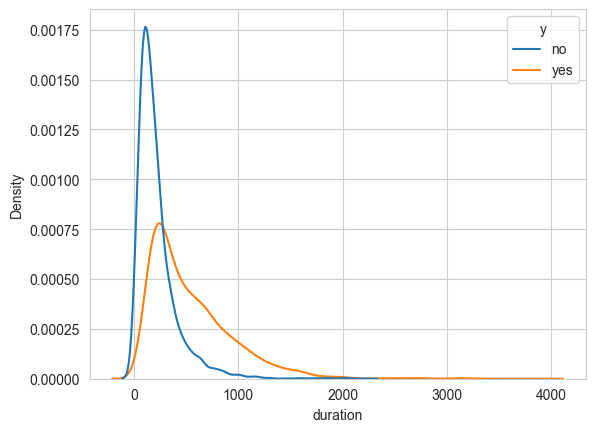

Data skewness: 2.1849690231930476


In [28]:
# Check data distribution
sns.kdeplot(train_rus, x="duration", hue="y")
plt.show()
print(f"Data skewness: {train_rus['duration'].skew()}")

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

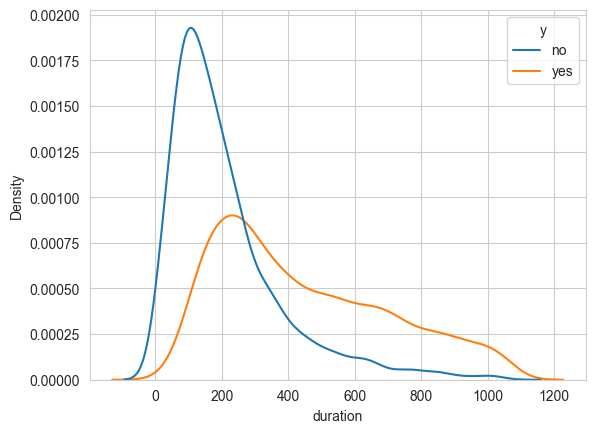

Data skewness: 1.1029875679631478


In [29]:
# Check data distribution
sns.kdeplot(remove_outliers(train_rus, "duration"), x="duration", hue="y")
plt.show()
print(f"Data skewness: {remove_outliers(train_rus, 'duration')['duration'].skew()}")

Client with higher `duration` tend to answer `yes`. It make sense since it indicates that the clients is willing to hear more about the campaign.

## Campaign

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

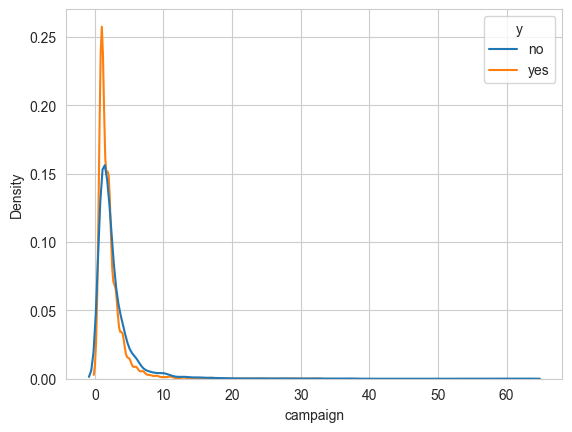

Data skewness: 6.153644744516648


In [30]:
# Check data distribution
sns.kdeplot(train_rus, x="campaign", hue="y")
plt.show()
print(f"Data skewness: {train_rus['campaign'].skew()}")

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

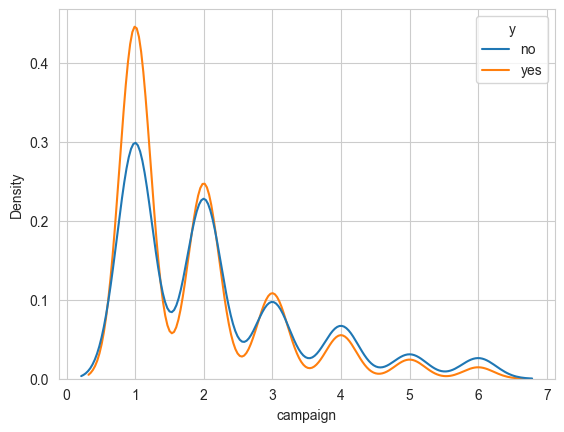

Data skewness: 1.3392234625510984


In [31]:
# Check data distribution
sns.kdeplot(remove_outliers(train_rus, "campaign"), x="campaign", hue="y")
plt.show()
print(f"Data skewness: {remove_outliers(train_rus, 'campaign')['campaign'].skew()}")

Client that less contacted during this campaign tend to answer `yes`.

## Pdays
`pdays` shows number of days that passed by after the client was last contacted from a previous campaign. `pdays == -1` means client was not previously contacted. To make it more consistent (higher means longer days passed), we will replace `pdays == -1` into `pdays = 999`.

In [32]:
train["pdays"] = train["pdays"].apply(lambda x: 999 if x == -1 else x)
train_rus["pdays"] = train_rus["pdays"].apply(lambda x: 999 if x == -1 else x)

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

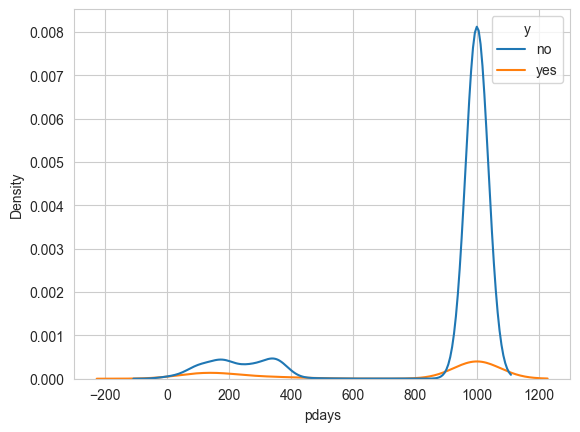

Data skewness: -1.7486341833951662


In [33]:
# Check data distribution
sns.kdeplot(train, x="pdays", hue="y")
plt.show()
print(f"Data skewness: {train['pdays'].skew()}")

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

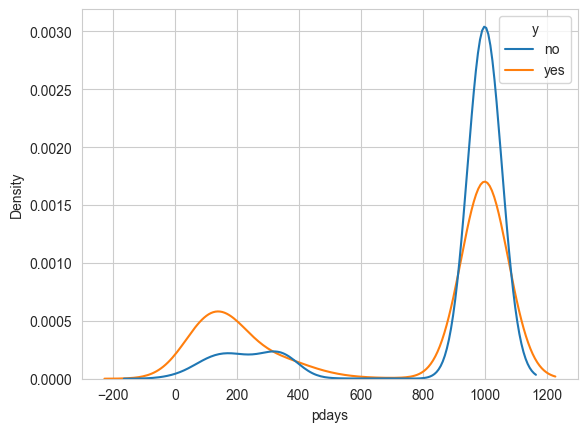

Data skewness: -1.2051169525039558


In [34]:
# Check data distribution
sns.kdeplot(train_rus, x="pdays", hue="y")
plt.show()
print(f"Data skewness: {train_rus['pdays'].skew()}")

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

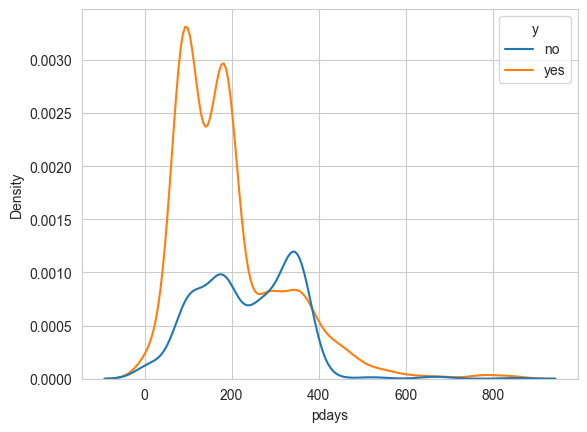

Data skewness: 1.2075335008042618


In [35]:
# Check data distribution
sns.kdeplot(train_rus[train_rus["pdays"] != 999], x="pdays", hue="y")
plt.show()
print(f"Data skewness: {train_rus[train_rus['pdays'] != 999]['pdays'].skew()}")

Client that last contacted below 200 days tend to be class `yes`.

## Previous
`previous` shows number of contacts performed before this campaign.

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

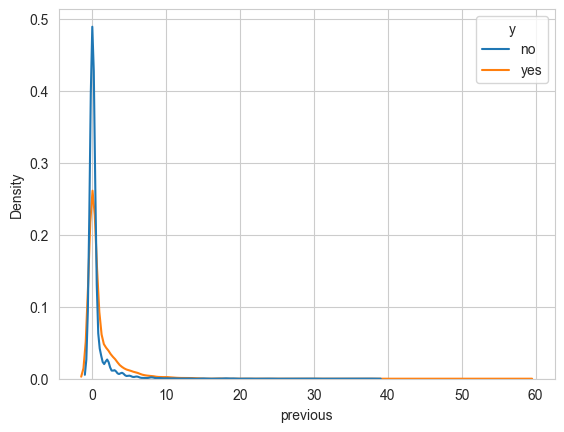

Data skewness: 7.833740431274571


In [36]:
# Check data distribution
sns.kdeplot(train_rus, x="previous", hue="y")
plt.show()
print(f"Data skewness: {train_rus['previous'].skew()}")

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

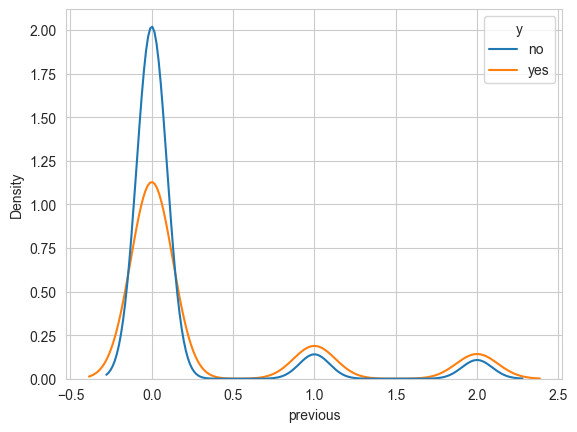

Data skewness: 2.307722510063121


In [37]:
# Check data distribution
sns.kdeplot(remove_outliers(train_rus, "previous"), x="previous", hue="y")
plt.show()
print(f"Data skewness: {remove_outliers(train_rus, 'previous')['previous'].skew()}")

## Poutcome
`poutcome` shows outcome of previous marketing campaign.

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

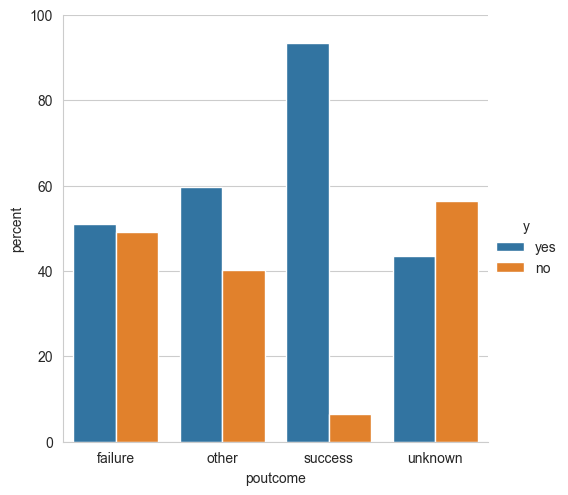

In [38]:
# Check proportion of data for each job
x = "poutcome"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

Client that previous campaign is `success` has high probability to become class `yes` in current campaign.

From EDA above, we can summary several interesting points:
1. When client has job category `retired` and `student`, they has higher probability to answer `yes` in current campaign, while `blue-collar` has higher probability to answer `no`. Since for other `job` has similar probability, we can re-categorize `job` into 4 class: `blue-collar`, `retired`, `student`, and `others`. By doing this we can reduce data dimension when using One-Hot Encoding.
2. There is no significant difference between `marital` status in terms of asnwer probability. But since there are only 3 category, for now we can keep this column even we need to do One-Hot Encoding.
3. There is no significant difference between `education` in terms of probability to become `yes`. We can do label encoding due to it's ordinality. For `unknown`, it has similar pattern with `secondary`, so later we will assume `unknown` as `secondary`, considering it's only 4% of the data.
4. When client has default credit, it tend to answer `no`. It make sense, since usually they want to focus on their credit first before applying for another campaign.
5. Client that has `housing` loan tend to answer `no`. It make sense since they want to focus on their `housing` loan.
6. Client that has `loan` tend to answer `no`. It make sense since they want to focus on their `loan`.
7. `contact` type `unknown` tend to answer `no`, while the others has similar probability. Later we will only categorize it into 2: `unknown` and `cellular/telephone` due to it's similarity.
8. Client tend to answer `yes` in several month. It means this feature potentially importance.
9. Client with higher `duration` tend to answer `yes`. It make sense since it indicates that the clients is willing to hear more about the campaign.
10. Client that less contacted during this campaign tend to answer `yes`.

# Preprocessing
Based on EDA, here are several things we do in preprocessing:
1. For column `job`, re-categorize into `blue-collar`, `student`, `retired`, and `others`.
2. For column `education`, replace `unknown` to `secondary`.
3. For column `contact`, merge `cellular` and `telephone` into `cellular/telephone`.
4. For column `pdays`, replace `pdays == -1` into `pdays = 999` for consistency.
5. Label Encoding for `education, default, housing, loan, contact, month and y` columns.

In [39]:
def preprocessing(data):
    # 0. Copy data
    data = data.copy()

    # 1. Re-categorize job
    data["job"] = data["job"].apply(lambda x: x if x in config["job_new_category"]["keep"] else config["job_new_category"]["replace"])

    # 2. Replace unknown to secondary for education column
    data["education"] = data["education"].apply(lambda x: config["education_replace"]["to"] if x in config["education_replace"]["from"] else x)

    # 3. Merge cellular and telephone for contact column
    data["contact"] = data["contact"].apply(lambda x: config["contact_merge"]["to"] if x in config["contact_merge"]["from"] else x)

    # 4. Replace -1 to 999 for pdays column
    data["pdays"] = data["pdays"].apply(lambda x: config["pdays_replace"]["to"] if x == config["pdays_replace"]["from"] else x)

    # 5. Label encoding
    for column in config["label_encoding_columns"]:
        data[column] = data[column].apply(lambda x: config[f"{column}_code"][x])
    
    return data

In [40]:
train_processed = preprocessing(train)

# Feature Engineering
Based on EDA, here are several things we do in feature engineering:
1. One-Hot Encoding for `job`, `marital`, and `poutcome`.

In [41]:
def feature_engineering(data):
    # 0. Copy data
    data = data.copy()

    # 1. One-Hot encoding
    for column in config["one_hot_encoding_columns"]:
        encoder = OneHotEncoder(drop="first", handle_unknown="error")
        encoder.fit(preprocessing(train)[[column]])
        encoded_data = encoder.transform(data[[column]])
        encoded_df = pd.DataFrame(encoded_data.toarray(),
                                  columns=encoder.get_feature_names_out([column]),
                                  index=data.index)
        data = pd.concat([data, encoded_df], axis=1)
        data = data.drop(columns=[column])

    return data

In [42]:
train_processed_feng = feature_engineering(train_processed)

In [43]:
train_processed_feng.head(2)

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job_others,job_retired,job_student,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single
13382,31,1,0,1,1,0,1,9,6,82,1,999,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32641,35,1,0,195,1,0,1,17,3,203,1,999,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Modelling
Since the objective is we want to avoid losing potential client (predicted answering `no` but actually answering `yes`), it means we want to find model with minimum `False Negative`. But, if the bank should call all of their client, they will need to put so much effort. Considering those information:
1. We try to get model with lowest `False Negative`, or we can say highest `recall`.
2. We also need to consider effort they need to put, so it's better if we have higher `precision`.
3. Based on those 2 points, it means we need to see `f1-score` and `auc roc score` to get overall performance.
4. At least, we get better result than baseline model.

In [44]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

In [45]:
# Load dataset
X_train = utils.pickle_load(config["train_processed_path"][0])
y_train = utils.pickle_load(config["train_processed_path"][1])

X_valid = utils.pickle_load(config["valid_processed_path"][0])
y_valid = utils.pickle_load(config["valid_processed_path"][1])

X_test = utils.pickle_load(config["test_processed_path"][0])
y_test = utils.pickle_load(config["test_processed_path"][1])

# Under sampling dataset
X_rus, y_rus = RandomUnderSampler(random_state=42).fit_resample(
    X_train,
    y_train
)

# Over sampling dataset
X_res, y_res = SMOTE(sampling_strategy="auto", random_state=42).fit_resample(
    X_train,
    y_train
)

In [46]:
# Define DataFrame to save model evaluation result
evaluation = pd.DataFrame(columns=["Model", "Resampling Method", 
                                   "Train Precision", "Valid Precision", "Test Precision",
                                   "Train Recall", "Valid Recall", "Test Recall",
                                   "Train F1 Score", "Valid F1 Score", "Test F1 Score",
                                   "Train AUC-ROC", "Valid AUC-ROC", "Test AUC-ROC",
                                   "Train Accuracy", "Valid Accuracy", "Test Accuracy"])

# Define models to try
models = [DummyClassifier(), DecisionTreeClassifier(), LogisticRegression()]

# Define resampling methods and it's dataset
resampling_methods = {"Default": [X_train, y_train], "Under Sampling": [X_rus, y_rus], "Over Sampling": [X_res, y_res]}

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

for model in models:
    for method, dataset in resampling_methods.items():
        clf = model

        # Add hyperparameter tuning here
        if model == DecisionTreeClassifier:
            grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='recall')
            grid_search.fit(dataset[0], dataset[1])
            best_params = grid_search.best_params_
            clf = DecisionTreeClassifier(**best_params)

        clf.fit(dataset[0], dataset[1])

        y_train_pred = clf.predict(dataset[0])
        y_valid_pred = clf.predict(X_valid)
        y_test_pred = clf.predict(X_test)

        result = {"Model": model, "Resampling Method": method,
                  "Valid Precision": precision_score(y_valid, y_valid_pred), 
                  "Valid Recall": recall_score(y_valid, y_valid_pred), 
                  "Valid F1 Score": f1_score(y_valid, y_valid_pred),
                  "Valid AUC-ROC": roc_auc_score(y_valid, y_valid_pred),
                  "Test Precision": precision_score(y_test, y_test_pred), 
                  "Test Recall": recall_score(y_test, y_test_pred), 
                  "Test F1 Score": f1_score(y_test, y_test_pred),
                  "Test AUC-ROC": roc_auc_score(y_test, y_test_pred),
                  "Train Accuracy": accuracy_score(dataset[1], y_train_pred),
                  "Valid Accuracy": accuracy_score(y_valid, y_valid_pred),
                  "Test Accuracy": accuracy_score(y_test, y_test_pred),
                  "Train Precision": precision_score(dataset[1], y_train_pred), 
                  "Train Recall": recall_score(dataset[1], y_train_pred), 
                  "Train F1 Score": f1_score(dataset[1], y_train_pred),
                  "Train AUC-ROC": roc_auc_score(dataset[1], y_train_pred),}
        
        evaluation = pd.concat([evaluation, pd.DataFrame(result, index=[0])], ignore_index=True)


d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carloa067660\AppData\Local\Temp\ipykernel_14628\2338329120

In [47]:
# Show evaluation result
x = evaluation.sort_values(by=["Valid Recall", "Test Recall"], ascending=False)
x

,Model,Resampling Method,Train Precision,Valid Precision,Test Precision,Train Recall,Valid Recall,Test Recall,Train F1 Score,Valid F1 Score,Test F1 Score,Train AUC-ROC,Valid AUC-ROC,Test AUC-ROC,Train Accuracy,Valid Accuracy,Test Accuracy
7,LogisticRegression(),Under Sampling,0.801351,0.355791,0.329863,0.769314,0.804786,0.759142,0.785006,0.493436,0.459893,0.789303,0.805783,0.777467,0.789303,0.806547,0.791507
4,DecisionTreeClassifier(),Under Sampling,1.000000,0.349943,0.345192,1.000000,0.769521,0.783102,1.000000,0.481102,0.479167,1.000000,0.789988,0.793204,1.000000,0.805662,0.800944
8,LogisticRegression(),Over Sampling,0.811707,0.369407,0.330948,0.787976,0.769521,0.699874,0.799666,0.499183,0.449393,0.802594,0.797670,0.756265,0.802594,0.819227,0.799469
5,DecisionTreeClassifier(),Over Sampling,1.000000,0.453109,0.407150,1.000000,0.541562,0.517024,1.000000,0.493402,0.455556,1.000000,0.727444,0.708671,1.000000,0.869802,0.855500
3,DecisionTreeClassifier(),Default,1.000000,0.500000,0.451372,1.000000,0.476071,0.456494,1.000000,0.487742,0.453918,1.000000,0.706472,0.691513,1.000000,0.882925,0.871572
6,LogisticRegression(),Default,0.606319,0.572052,0.526749,0.191788,0.164987,0.161412,0.291402,0.256109,0.247104,0.587646,0.574311,0.571105,0.890890,0.887791,0.884990
0,DummyClassifier(),Default,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.883022,0.882925,0.883073
1,DummyClassifier(),Under Sampling,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.882925,0.883073
2,DummyClassifier(),Over Sampling,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.882925,0.883073


In [48]:
x.head(3)

,Model,Resampling Method,Train Precision,Valid Precision,Test Precision,Train Recall,Valid Recall,Test Recall,Train F1 Score,Valid F1 Score,Test F1 Score,Train AUC-ROC,Valid AUC-ROC,Test AUC-ROC,Train Accuracy,Valid Accuracy,Test Accuracy
7,LogisticRegression(),Under Sampling,0.801351,0.355791,0.329863,0.769314,0.804786,0.759142,0.785006,0.493436,0.459893,0.789303,0.805783,0.777467,0.789303,0.806547,0.791507
4,DecisionTreeClassifier(),Under Sampling,1.000000,0.349943,0.345192,1.000000,0.769521,0.783102,1.000000,0.481102,0.479167,1.000000,0.789988,0.793204,1.000000,0.805662,0.800944
8,LogisticRegression(),Over Sampling,0.811707,0.369407,0.330948,0.787976,0.769521,0.699874,0.799666,0.499183,0.449393,0.802594,0.797670,0.756265,0.802594,0.819227,0.799469


In [49]:
x[(x["Model"] == x["Model"].unique()[0]) & (x["Resampling Method"] != "Default")]

,Model,Resampling Method,Train Precision,Valid Precision,Test Precision,Train Recall,Valid Recall,Test Recall,Train F1 Score,Valid F1 Score,Test F1 Score,Train AUC-ROC,Valid AUC-ROC,Test AUC-ROC,Train Accuracy,Valid Accuracy,Test Accuracy
7,LogisticRegression(),Under Sampling,0.801351,0.355791,0.329863,0.769314,0.804786,0.759142,0.785006,0.493436,0.459893,0.789303,0.805783,0.777467,0.789303,0.806547,0.791507
8,LogisticRegression(),Over Sampling,0.811707,0.369407,0.330948,0.787976,0.769521,0.699874,0.799666,0.499183,0.449393,0.802594,0.797670,0.756265,0.802594,0.819227,0.799469


From the result above, we see that all of our models are better than baseline. But Decision Tree seems to be overfitted eventhough we already do hyperparameter tuning. Finally, we get best schema are Logistic Regression with Under Sampling or Over Sampling method. Since the performance of them are very similar, I preferly choose Under Sampling due to it's computational efficiency and safer approach (because Over Sampling is we add not fully real data).

In [50]:
# Define DataFrame to save model evaluation result
evaluation = pd.DataFrame(columns=["Model", "Resampling Method", 
                                   "Train Precision", "Valid Precision", "Test Precision",
                                   "Train Recall", "Valid Recall", "Test Recall",
                                   "Train F1 Score", "Valid F1 Score", "Test F1 Score",
                                   "Train AUC-ROC", "Valid AUC-ROC", "Test AUC-ROC",
                                   "Train Accuracy", "Valid Accuracy", "Test Accuracy"])

# Define models to try
models = [LogisticRegression()]

# Define resampling methods and it's dataset
resampling_methods = {"Default": [X_train, y_train], "Under Sampling": [X_rus, y_rus], "Over Sampling": [X_res, y_res]}

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

for model in models:
    for method, dataset in resampling_methods.items():
        clf = model

        # Add hyperparameter tuning here
        if model == LogisticRegression:
            grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
            grid_search.fit(dataset[0], dataset[1])
            best_params = grid_search.best_params_
            clf = LogisticRegression(**best_params)

        clf.fit(dataset[0], dataset[1])

        y_train_pred = clf.predict(X_train)
        y_valid_pred = clf.predict(X_valid)
        y_test_pred = clf.predict(X_test)

        result = {
            "Model": model, "Resampling Method": method,
            "Valid Precision": precision_score(y_valid, y_valid_pred), 
            "Valid Recall": recall_score(y_valid, y_valid_pred), 
            "Valid F1 Score": f1_score(y_valid, y_valid_pred),
            "Valid AUC-ROC": roc_auc_score(y_valid, y_valid_pred),
            "Test Precision": precision_score(y_test, y_test_pred), 
            "Test Recall": recall_score(y_test, y_test_pred), 
            "Test F1 Score": f1_score(y_test, y_test_pred),
            "Test AUC-ROC": roc_auc_score(y_test, y_test_pred),
            "Train Accuracy": accuracy_score(y_train, y_train_pred),
            "Valid Accuracy": accuracy_score(y_valid, y_valid_pred),
            "Test Accuracy": accuracy_score(y_test, y_test_pred),
            "Train Precision": precision_score(y_train, y_train_pred), 
            "Train Recall": recall_score(y_train, y_train_pred), 
            "Train F1 Score": f1_score(y_train, y_train_pred),
            "Train AUC-ROC": roc_auc_score(y_train, y_train_pred),
        }

        evaluation = pd.concat([evaluation, pd.DataFrame(result, index=[0])], ignore_index=True)

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\carloa067660\AppData\Local\Temp\ipykernel_14628\4081173808.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation = pd.concat([evaluation, pd.DataFrame(result, index=[0])], ignore_index=True)
d:\portfo

In [51]:
evaluation.sort_values(by=["Valid Recall", "Test Recall"], ascending=False)

,Model,Resampling Method,Train Precision,Valid Precision,Test Precision,Train Recall,Valid Recall,Test Recall,Train F1 Score,Valid F1 Score,Test F1 Score,Train AUC-ROC,Valid AUC-ROC,Test AUC-ROC,Train Accuracy,Valid Accuracy,Test Accuracy
1,LogisticRegression(),Under Sampling,0.337641,0.355791,0.329863,0.769314,0.804786,0.759142,0.469309,0.493436,0.459893,0.784693,0.805783,0.777467,0.796474,0.806547,0.791507
2,LogisticRegression(),Over Sampling,0.348552,0.369407,0.330948,0.738250,0.769521,0.699874,0.473534,0.499183,0.449393,0.777731,0.797670,0.756265,0.807975,0.819227,0.799469
0,LogisticRegression(),Default,0.606319,0.572052,0.526749,0.191788,0.164987,0.161412,0.291402,0.256109,0.247104,0.587646,0.574311,0.571105,0.890890,0.887791,0.884990
